# IMPORTING REQURIED LIBRARIES

In [17]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import os 
import pandas_profiling as pf
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.statespace.sarimax import SARIMAX
from math import sqrt
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from pmdarima import auto_arima
import pickle
import warnings 
warnings.filterwarnings('ignore')

### Changing The Default Working Directory Path & Reading the Dataset using Pandas Command along with that changing the index column with Month column and also changing the data type of Month column as DateTime

In [8]:
os.chdir('F:\\Data science batch 74\\Batch 74 Day 22\\Batch 74 Day 22')


# Exploratory Data Analysis(EDA)

### Checking the data type of the column in the dataset

In [9]:
df= pd.read_csv('monthly-milk-production.csv',index_col= 'Month',parse_dates=True)
df

,Milk Production
Month,
1962-01-01,589.0
1962-02-01,561.0
1962-03-01,640.0
1962-04-01,656.0
1962-05-01,727.0
...,...
1975-08-01,858.0
1975-09-01,817.0
1975-10-01,827.0


### Extracting the shape of the dataset

In [10]:
df.shape

(168, 1)

### Scrutinizing  the null values in the column from the dataset

In [11]:
df.isna().sum()

Milk Production    0
dtype: int64

### Getting the summary of various descriptive statistics for the numeric column in the dataset

In [12]:
df.describe()

,Milk Production
count,168.000000
mean,754.708333
std,102.204524
min,553.000000
25%,677.750000
50%,761.000000
75%,824.500000
max,969.000000


# Data Visualization
### Plotting the line graph to show the data trend in the dataset and saving the graph as PNG file

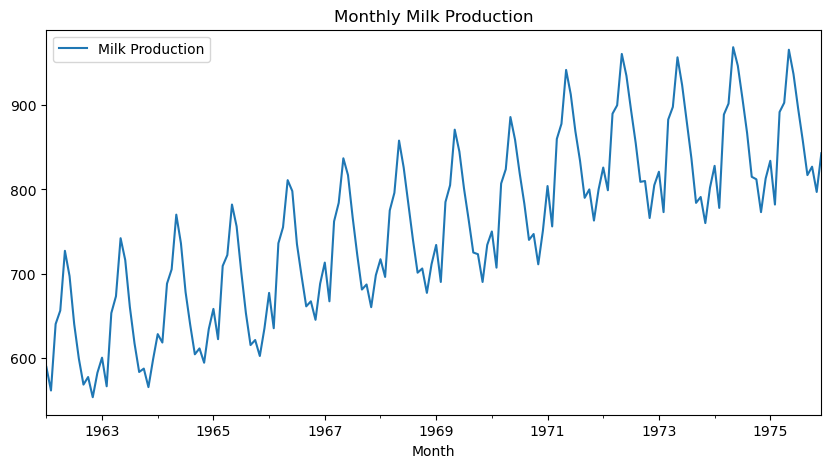

In [13]:
df.plot(figsize =(10, 5))
plt.title('Monthly Milk Production')
plt.savefig('Monthly Milk Production.png')
plt.show()

# Pandas profiling

In [15]:
display(pf.ProfileReport(df))

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [8]:

from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df, period = 12)
fig = plt.figure()
fig= decomposition.plot()
%matplotlib inline


In [9]:
%matplotlib inline


<Figure size 640x480 with 0 Axes>

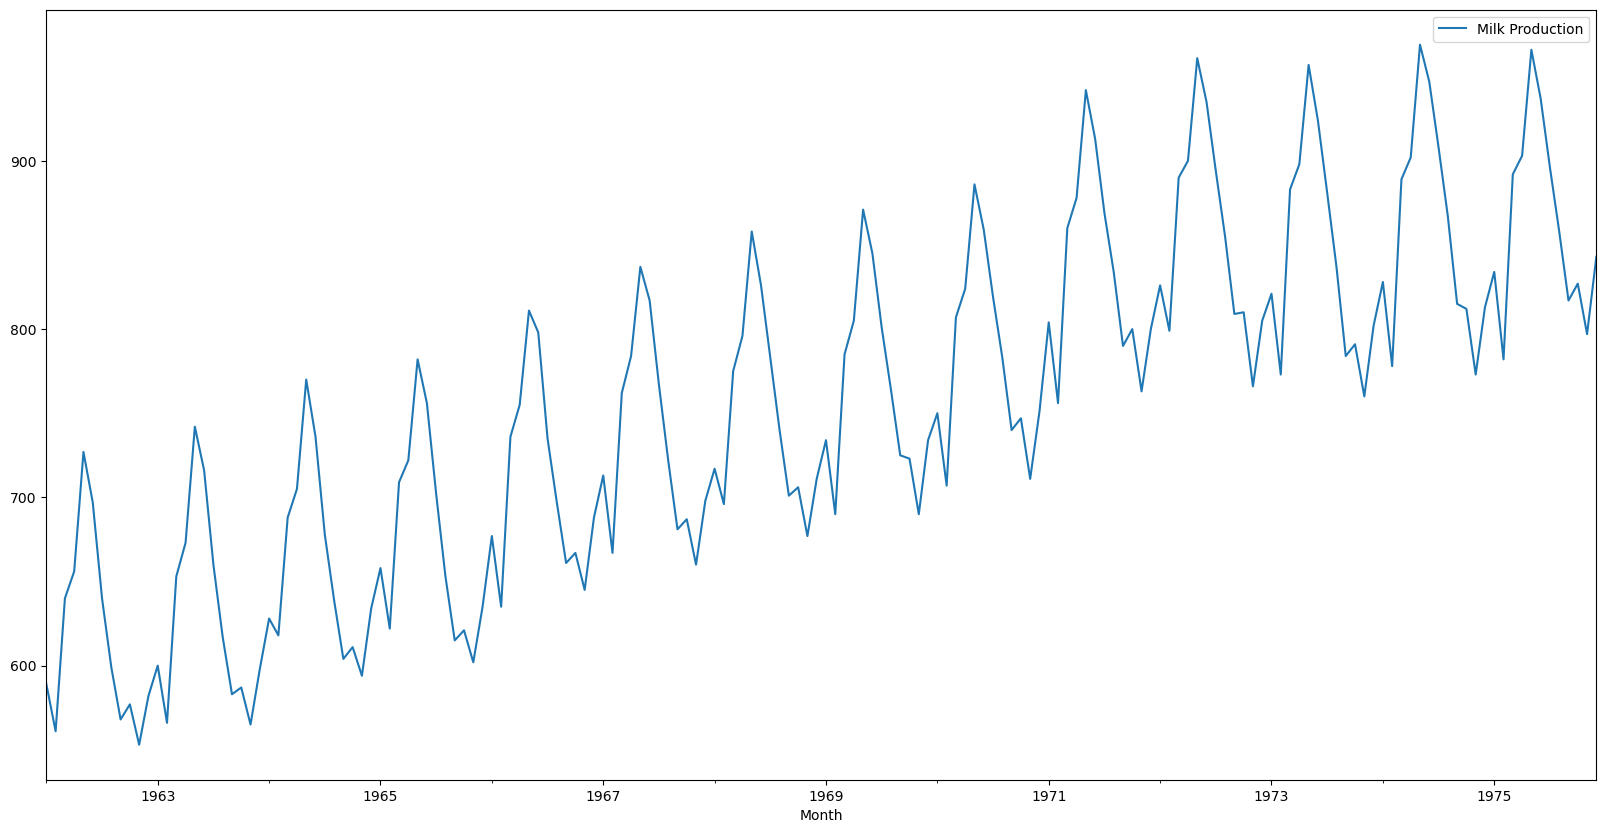

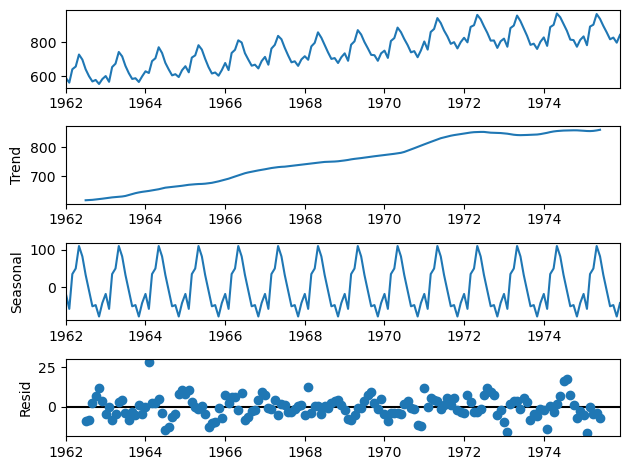

In [10]:

from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df, period = 12)
fig = plt.figure()
df.plot(figsize=(20,10))
fig= decomposition.plot()

In [11]:
from pmdarima import auto_arima
auto_arima(df, m = 12, trace = True, D=1).summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=1076.442, Time=2.50 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=1324.708, Time=0.06 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=1092.340, Time=0.53 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=1211.922, Time=0.62 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=1452.434, Time=0.06 sec
 ARIMA(2,0,2)(0,1,1)[12] intercept   : AIC=1074.582, Time=1.53 sec
 ARIMA(2,0,2)(0,1,0)[12] intercept   : AIC=1119.880, Time=0.56 sec
 ARIMA(2,0,2)(0,1,2)[12] intercept   : AIC=1076.422, Time=3.22 sec
 ARIMA(2,0,2)(1,1,0)[12] intercept   : AIC=1089.179, Time=1.61 sec
 ARIMA(2,0,2)(1,1,2)[12] intercept   : AIC=inf, Time=5.21 sec
 ARIMA(1,0,2)(0,1,1)[12] intercept   : AIC=1073.351, Time=1.12 sec
 ARIMA(1,0,2)(0,1,0)[12] intercept   : AIC=1119.515, Time=0.37 sec
 ARIMA(1,0,2)(1,1,1)[12] intercept   : AIC=1075.202, Time=1.70 sec
 ARIMA(1,0,2)(0,1,2)[12] intercept   : AIC=1075.178, Time=1.89 sec
 ARIMA(1,0,2)(1,1,0)[12]

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  168
Model:             SARIMAX(2, 0, 0)x(0, 1, [1], 12)   Log Likelihood                -531.033
Date:                              Mon, 24 Jul 2023   AIC                           1072.066
Time:                                      09:50:39   BIC                           1087.315
Sample:                                  01-01-1962   HQIC                          1078.260
                                       - 12-01-1975                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.6062      0.905      1.775      0.076      -0.168       3.380
ar.L1          0.7310      0.084      8.737      0.000       0.567       0.895
ar.L2          0.1887      0.080      2.355      0.019       0.032       0.346
ma.S.L12      -0.6166      0.073     -8.403      0.000      -0.760      -0.473
sigma2        50.7122      4.915     10.317      0.000      41.078      60.346
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                42.72
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.83   Skew:                             0.78
Prob(H) (two-sided):                  0.52   Kurtosis:                         5.03
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [12]:
from pmdarima import auto_arima
auto_arima (df,m=12,trace =True ,D=1 ).summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=1076.442, Time=2.40 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=1324.708, Time=0.05 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=1092.340, Time=0.53 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=1211.922, Time=0.62 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=1452.434, Time=0.05 sec
 ARIMA(2,0,2)(0,1,1)[12] intercept   : AIC=1074.582, Time=1.58 sec
 ARIMA(2,0,2)(0,1,0)[12] intercept   : AIC=1119.880, Time=0.52 sec
 ARIMA(2,0,2)(0,1,2)[12] intercept   : AIC=1076.422, Time=3.12 sec
 ARIMA(2,0,2)(1,1,0)[12] intercept   : AIC=1089.179, Time=1.54 sec
 ARIMA(2,0,2)(1,1,2)[12] intercept   : AIC=inf, Time=5.08 sec
 ARIMA(1,0,2)(0,1,1)[12] intercept   : AIC=1073.351, Time=1.02 sec
 ARIMA(1,0,2)(0,1,0)[12] intercept   : AIC=1119.515, Time=0.31 sec
 ARIMA(1,0,2)(1,1,1)[12] intercept   : AIC=1075.202, Time=1.70 sec
 ARIMA(1,0,2)(0,1,2)[12] intercept   : AIC=1075.178, Time=1.83 sec
 ARIMA(1,0,2)(1,1,0)[12]

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  168
Model:             SARIMAX(2, 0, 0)x(0, 1, [1], 12)   Log Likelihood                -531.033
Date:                              Mon, 24 Jul 2023   AIC                           1072.066
Time:                                      09:51:27   BIC                           1087.315
Sample:                                  01-01-1962   HQIC                          1078.260
                                       - 12-01-1975                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.6062      0.905      1.775      0.076      -0.168       3.380
ar.L1          0.7310      0.084      8.737      0.000       0.567       0.895
ar.L2          0.1887      0.080      2.355      0.019       0.032       0.346
ma.S.L12      -0.6166      0.073     -8.403      0.000      -0.760      -0.473
sigma2        50.7122      4.915     10.317      0.000      41.078      60.346
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                42.72
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.83   Skew:                             0.78
Prob(H) (two-sided):                  0.52   Kurtosis:                         5.03
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Plotting the histogram and KDE line graph to show the distribution of data in the dataset and saving the graph as PNG file



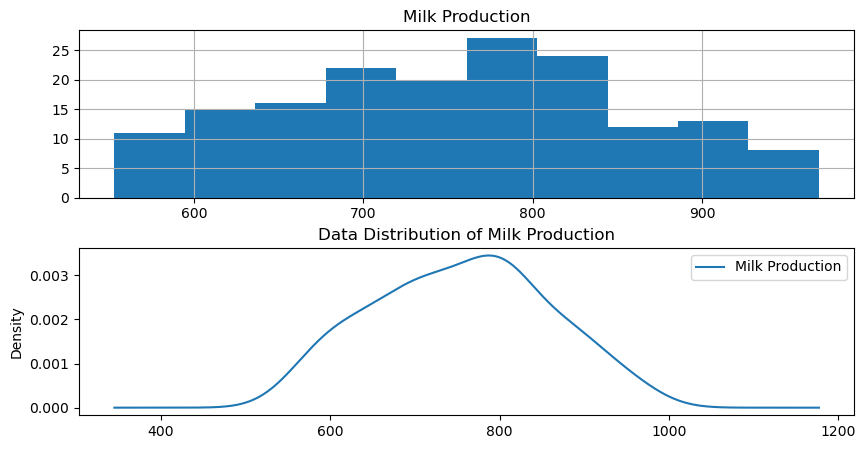

In [26]:
fig, (ax1, ax2) = plt.subplots(nrows = 2, ncols = 1, sharex = False, sharey = False, figsize = (10, 5))
df.hist(ax = ax1)
df.plot(kind = 'kde', ax = ax2 )
plt.title('Data Distribution of Milk Production')
plt.savefig('Data Distribution of Milk Production.png')
plt.show()

### Plotting the graph with "Seasonal Decompose" function to show the Data Description, Trend, Seasonal, Residuals and saving the graph as PNG file



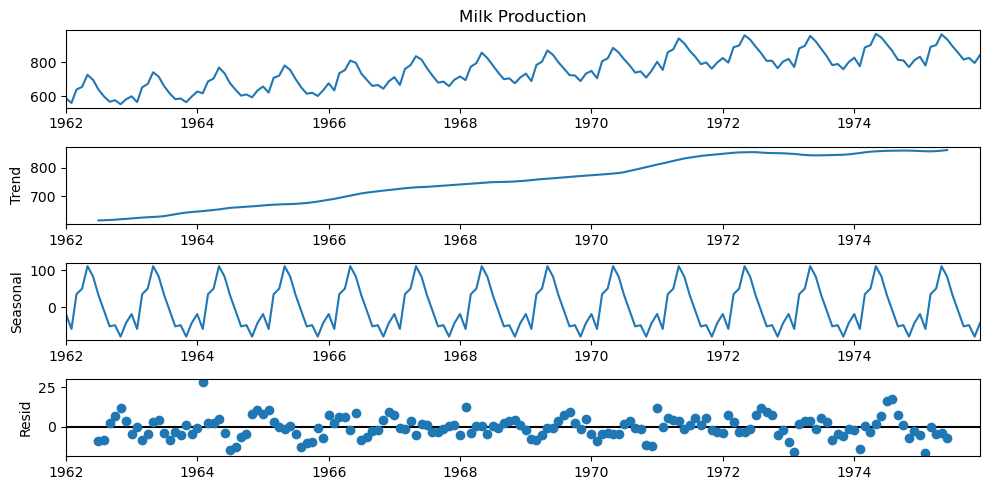

In [27]:
plt.rcParams['figure.figsize']=10,5
decomposition = seasonal_decompose(df['Milk Production'],period=12,model='additive')
decomposition.plot()
plt.savefig('Trend, Seasonal, Residual Graph.png')
plt.show()

### Plotting the graphs with Auto-Correlation and Partial Auto-Correlation of the data from the dataset and saving the graphs as PNG file



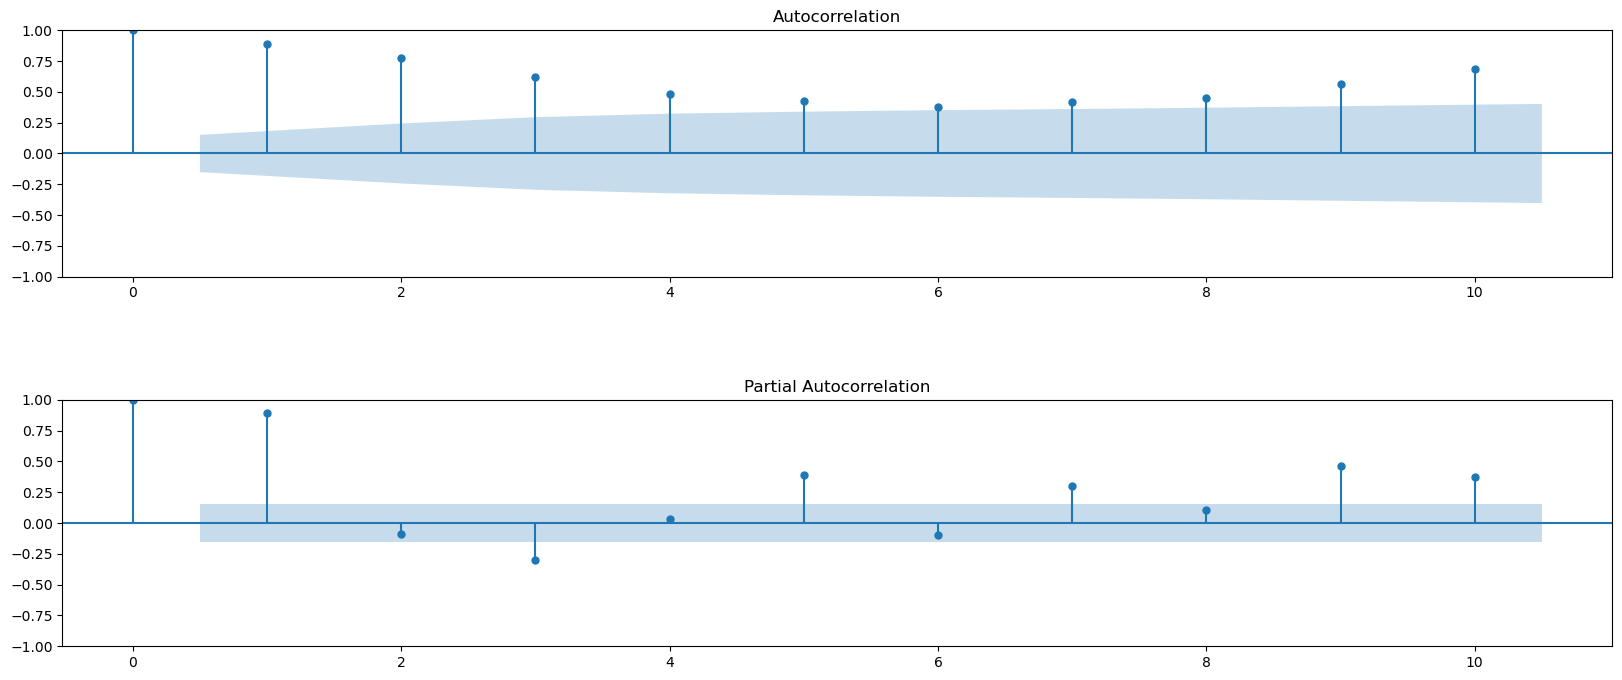

In [28]:
fig,(ax1,ax2) = plt.subplots(nrows=2,ncols=1,sharex= False,sharey=False,figsize=(20,8))
ax1 = plot_acf(df['Milk Production'],lags=10,ax=ax1)
ax2 = plot_pacf(df['Milk Production'],lags=10,ax=ax2)
plt.subplots_adjust(hspace= 0.5)
plt.savefig('ACF & PACF.png')
plt.show()

# Data Tranmsformation
### The adf_check() function performs an Augmented Dickey-Fuller test on a time series. The test is used to determine whether a time series is stationary or not. If the p-value of the test is less than or equal to 0.05, then there is strong evidence against the null hypothesis, and the series is considered to be stationary. Otherwise, the series is considered to be non-stationary. The function takes a time series as input and returns the results of the test. The results are printed to the console, along with a message indicating whether the series is stationary or not.



In [29]:
def adf_check (time_series):
    result= adfuller(time_series)
    print('Augmented Dickey Fuller Test :')
    labels = ['ADF Test Statistics ','P Value','Number of lags used ','Number of Obsevations']
    for values,label in zip(result,labels):
        print(label+' : '+str(values))
    if result[1] <= 0.005:
        print ('Strong evidence against the null hypothesis, hence REJECT null hypothesis and the series is Stationary ')
    else:
        print ('Weak evidence against the null hypothesis, hence ACCEPT null hypothesis and the series is Not Stationary ')

### Performing the Augmented Dickey-Fuller test on the original data in the dataset to find whether the time series is stationary or not

In [30]:
adf_check(df['Milk Production'])

Augmented Dickey Fuller Test :
ADF Test Statistics  : -1.3038115874221303
P Value : 0.6274267086030312
Number of lags used  : 13
Number of Obsevations : 154
Weak evidence against the null hypothesis, hence ACCEPT null hypothesis and the series is Not Stationary 


### Since the Time Series is Not Stationary, the dataset is transformed as a new DataFrame with First Differene and Seasonal First Difference to make it as a Stationary Series

In [31]:
df1 = df.diff().diff(12).dropna()

In [32]:
df

,Milk Production
Month,
1962-01-01,589.0
1962-02-01,561.0
1962-03-01,640.0
1962-04-01,656.0
1962-05-01,727.0
...,...
1975-08-01,858.0
1975-09-01,817.0
1975-10-01,827.0


In [33]:
df1

,Milk Production
Month,
1963-02-01,-6.0
1963-03-01,8.0
1963-04-01,4.0
1963-05-01,-2.0
1963-06-01,4.0
...,...
1975-08-01,3.0
1975-09-01,11.0
1975-10-01,13.0


### Performing again the Augmented Dickey-Fuller test on the new transformed data from the dataset to find whether the time series is stationary or not

In [34]:
adf_check(df1['Milk Production'])

Augmented Dickey Fuller Test :
ADF Test Statistics  : -5.03800227492198
P Value : 1.865423431878859e-05
Number of lags used  : 11
Number of Obsevations : 143
Strong evidence against the null hypothesis, hence REJECT null hypothesis and the series is Stationary 


### Plotting the line graph to show the data trend in the transformed data from the dataset and saving the graph as PNG file



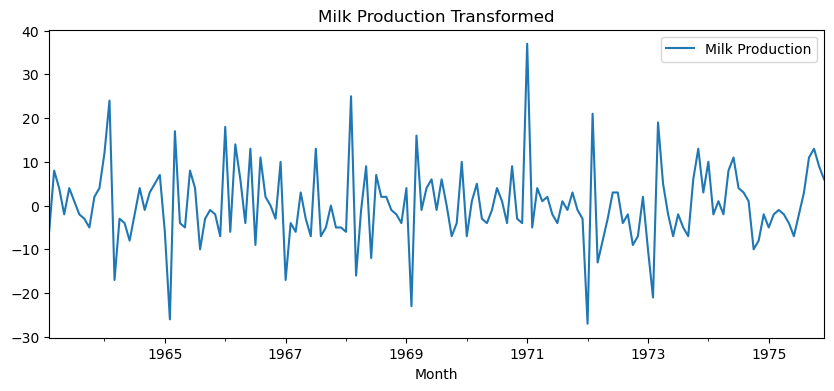

In [35]:
df1.plot(figsize=(10,4))
plt.title('Milk Production Transformed')
plt.savefig('Monthly Milk Production(Transformed).png')
plt.show()

### Plotting the graph with pandas plotting autocorrelation_plot to show the difference between the Stationary Data and Non-Stationary Data and saving it as PNG file



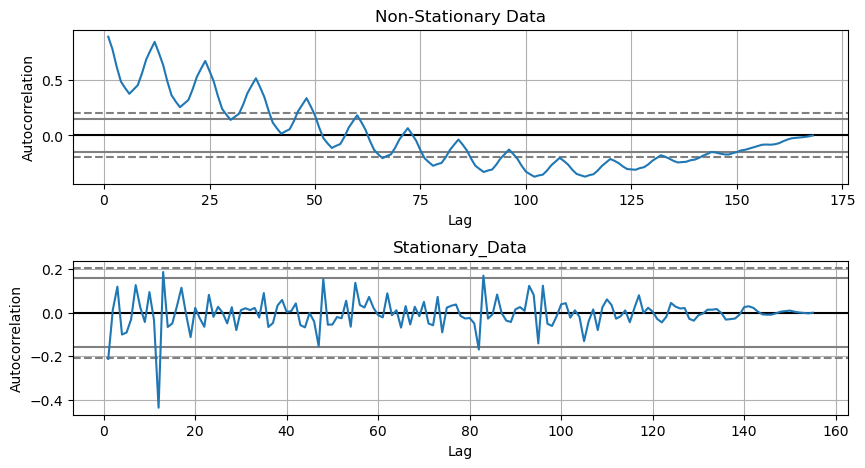

In [36]:
fig, (ax1, ax2) = plt.subplots(nrows = 2, ncols = 1, sharex = False, sharey = False, figsize = (10,5))
ax1 = autocorrelation_plot(df['Milk Production'], ax = ax1)
ax1.set_title('Non-Stationary Data')
ax2 = autocorrelation_plot(df1['Milk Production'], ax = ax2)
ax2.set_title('Stationary_Data')
plt.subplots_adjust(hspace = 0.5)
plt.savefig('Autocorrelation_plot of Stationary & Non-Stationary.png')
plt.show()

# Model Fitting
### Getting the p value and q value for the model fitting using auto_arima function by passing through some needed parameters, the best model is evaluated by least Akaike Information Criterion[AIC]

In [70]:
model = auto_arima(df['Milk Production'],d=1,D=1,seasonal=True,m=12,max_order=6,start_p=1,start_q=1,test='adf',trace=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=1069.775, Time=0.68 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1119.969, Time=0.06 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1081.584, Time=0.19 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1066.296, Time=0.38 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=1114.995, Time=0.11 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=1068.030, Time=0.50 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=1067.976, Time=0.69 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1082.123, Time=0.17 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=inf, Time=2.22 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=1072.280, Time=0.22 sec
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=1068.064, Time=0.49 sec
 ARIMA(0,1,2)(0,1,1)[12]             : AIC=1067.796, Time=0.39 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=1066.207, Time=0.34 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1114.845, Time=0.10 sec
 ARIMA(1,1,0)(1,1,1)[12]

### Defining the summary of the model fitted with auto_arima function, here getting various information such as Akaike Information Criterion[AIC], Bayesian Information Criterion[BIC}, Hannan-Quinn Information Criterion[HQIC], Log Likelihood etc. from which we can evaluate the model

In [71]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  168
Model:             SARIMAX(1, 1, 0)x(0, 1, [1], 12)   Log Likelihood                -530.104
Date:                              Mon, 24 Jul 2023   AIC                           1066.207
Time:                                      11:47:38   BIC                           1075.337
Sample:                                  01-01-1962   HQIC                          1069.916
                                       - 12-01-1975                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2253      0.077     -2.925      0.003      -0.376      -0.074
ma.S.L12      -0.6190      0.070     -8.825      0.000      -0.757      -0.482
sigma2        52.6908      4.897     10.759      0.000      43.093      62.289
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                35.11
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):               0.82   Skew:                             0.74
Prob(H) (two-sided):                  0.49   Kurtosis:                         4.80
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Splitting the dataset in training data(85%) and test data(15%)

In [40]:
train = df[:int(0.85*len(df))]
test = df[int(0.85*len(df)):]

### Getting the shapes of training data and test data, so that we can able to know the exact observations in training and test data



In [41]:
train.shape,test.shape

((142, 1), (26, 1))

#### Fitting the model in SARIMAX model with the best value got from auto_arima model in the training data and getting the summary of the fitted model



In [42]:
model = SARIMAX(train['Milk Production'],order=(1,1,0),seasonal_order=(0,1,1,12))
result=model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                      Milk Production   No. Observations:                  142
Model:             SARIMAX(1, 1, 0)x(0, 1, [1], 12)   Log Likelihood                -445.603
Date:                              Tue, 25 Jul 2023   AIC                            897.205
Time:                                      18:59:10   BIC                            905.785
Sample:                                  01-01-1962   HQIC                           900.691
                                       - 10-01-1973                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2728      0.087     -3.149      0.002      -0.443      -0.103
ma.S.L12      -0.6158      0.086     -7.163      0.000      -0.784      -0.447
sigma2        56.0243      5.765      9.719      0.000      44.726      67.323
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):                40.04
Prob(Q):                              0.78   Prob(JB):                         0.00
Heteroskedasticity (H):               1.12   Skew:                             0.86
Prob(H) (two-sided):                  0.71   Kurtosis:                         5.12
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#### Plotting the Diagnostic plot for the fitted model to show the best fit of the model and saving it as PNG file



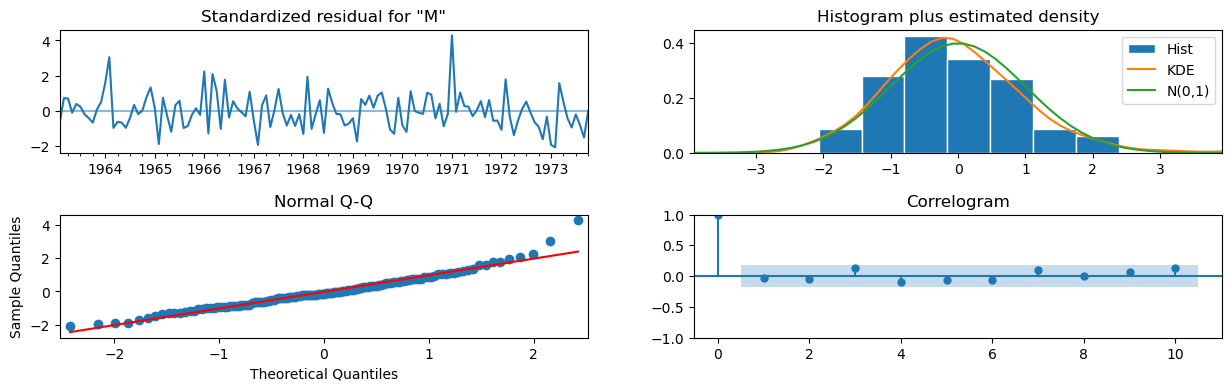

In [43]:
result.plot_diagnostics(figsize=(15,4))
plt.subplots_adjust(hspace=0.5)
plt.savefig('Diagnostic Plot of Best Model')
plt.show()

### Predicting the values using test data and renaming it as "Predictions"

In [45]:
prediction = result.predict(len(train),len(train)+len(test)-1,typ='levels').rename('Prediction')

#### Comparing the predicted value with actual value in the test data


In [46]:
for i in range(len(prediction)):
    print(f"predicted = {prediction[i]:<6.5},expected={test['Milk Production'][i]}")

predicted = 752.78,expected=760.0
predicted = 791.71,expected=802.0
predicted = 816.61,expected=828.0
predicted = 775.71,expected=778.0
predicted = 876.54,expected=889.0
predicted = 891.67,expected=902.0
predicted = 952.58,expected=969.0
predicted = 923.4 ,expected=947.0
predicted = 880.27,expected=908.0
predicted = 839.96,expected=867.0
predicted = 792.91,expected=815.0
predicted = 798.32,expected=812.0
predicted = 760.53,expected=773.0
predicted = 799.34,expected=813.0
predicted = 824.27,expected=834.0
predicted = 783.37,expected=782.0
predicted = 884.2 ,expected=892.0
predicted = 899.33,expected=903.0
predicted = 960.24,expected=966.0
predicted = 931.06,expected=937.0
predicted = 887.93,expected=896.0
predicted = 847.62,expected=858.0
predicted = 800.57,expected=817.0
predicted = 805.97,expected=827.0
predicted = 768.19,expected=797.0
predicted = 807.0 ,expected=843.0


#### Plotting the line graph with the Predicted value and Test Data value and saving the graph as PNG file



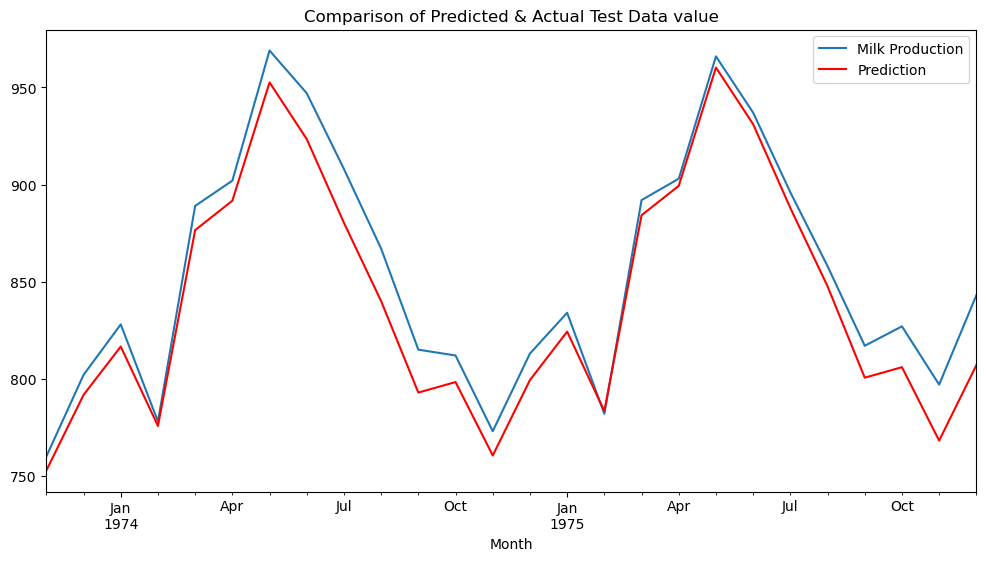

In [47]:
test['Milk Production'].plot(figsize=(12,6))
prediction.plot(color='red')
plt.title('Comparison of Predicted & Actual Test Data value')
plt.legend()
plt.savefig('Comparison of Predicted & Actual Test Data value.png')
plt.show()

# Model Evaluation
#### Evaluating the model with the following metrics such as R2 Score, Mean Squared Error, Root Mean Squared Error, Mean Absolute Error and Mean Absolute Percentage Error for the predicted value and test data value

In [48]:
print('Evaluation Results for Test Data : \n')
print(' Percenatge of R2 Score : {} %'.format(100*(r2_score(test['Milk Production'],prediction))),'\n')
print(' Mean Squared Error : ',mean_squared_error(test['Milk Production'],prediction),'\n')
print(' Root Mean Squared Error : ',sqrt(mean_squared_error(test['Milk Production'],prediction)),'\n')
print(' Mean Absolute Error : ',mean_absolute_error(test['Milk Production'],prediction),'\n')
print(' Mean Absolute Percentage Error : {0:.2f} %'.format(100*mean_absolute_percentage_error(test['Milk Production'],prediction)),'\n')


Evaluation Results for Test Data : 

 Percenatge of R2 Score : 92.40433712932766 % 

 Mean Squared Error :  274.9406359048584 

 Root Mean Squared Error :  16.581333960356098 

 Mean Absolute Error :  14.062888835628796 

 Mean Absolute Percentage Error : 1.65 % 



# Model Testing
#### Creating the pickle file with the best model that gives high R2 score for the test data

In [49]:
pickle.dump(result,open('Best Model.pkl','wb'))

#### Loading the pickle file and predicting the whole data for testing

In [50]:
final_model = pickle.load(open('Best Model.pkl','rb'))
fpred = final_model.predict(0, 167, typ = 'levels')

#### Evaluating the model with the following metrics such as R2 Score, Mean Squared Error, Root Mean Squared Error, Mean Absolute Error and Mean Absolute Percentage Error for the predicted value and whole data

In [51]:
print('Evaluation Results for whole Data : \n')
print(' Percenatge of R2 Score : {} %'.format(100*(r2_score(df['Milk Production'],fpred))),'\n')
print(' Mean Squared Error : ',mean_squared_error(df['Milk Production'],fpred),'\n')
print(' Root Mean Squared Error : ',sqrt(mean_squared_error(df['Milk Production'],fpred)),'\n')
print(' Mean Absolute Error : ',mean_absolute_error(df['Milk Production'],fpred),'\n')
print(' Mean Absolute Percentage Error : {0:.2f} %'.format(100*mean_absolute_percentage_error(df['Milk Production'],fpred)),'\n')


Evaluation Results for whole Data : 

 Percenatge of R2 Score : 73.71069997172135 % 

 Mean Squared Error :  2729.7724846141655 

 Root Mean Squared Error :  52.24722465944163 

 Mean Absolute Error :  14.24636104695002 

 Mean Absolute Percentage Error : 2.12 % 



# Forecasting
### Forecasting the result for the future dates using the loaded model

In [53]:
forecast = final_model.predict(start = '1976-01-01', end = '1980-12-01')

### Plotting the line graph with given data and predicted future data and saving it as PNG file



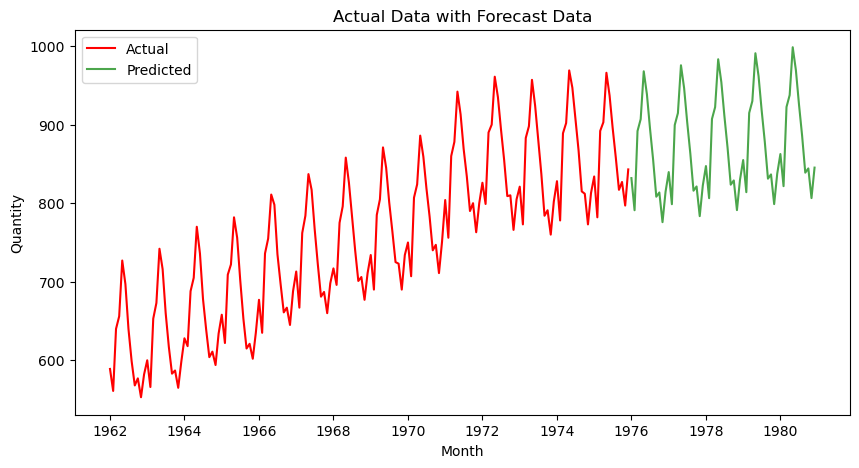

In [54]:
plt.plot(df, color = 'red', label = 'Actual',alpha = 1)
plt.plot(forecast, color = 'green', label = 'Predicted', alpha = 0.7)
plt.xlabel('Month')
plt.ylabel('Quantity')
plt.legend()
plt.title('Actual Data with Forecast Data')
plt.savefig('Actual Data with Forecast Data.png')
plt.show()

### Making the forecasted value as dataframe, concating it with dataframe and exporting the DataFrame to [Comma Seperated Value]csv file



In [55]:
forecast_df=pd.DataFrame(forecast)
forecast_df.rename(columns={'predicted_mean': 'Predicted Future Milk Production'}, inplace=True)
final = pd.concat([df,forecast_df],axis=1)
final['Predicted Future Milk Production'] = final['Predicted Future Milk Production'].round(2)
final.to_csv('Future Predicted Milk Production.csv')